In [1]:
##### import the functions I used 
%run functions.ipynb

## Data Exploration

In [2]:
##### Load Data
### TS
mktcap = read_mktcap(file_dir='./data/MARKET_CAP.pickle')
rtn = read_rtn(file_dir='./data/ASSET_RETURNS.pickle')
### Static - 33 sectors covered 
sector = read_sector(file_dir='./data/SECTOR_CLASSIFICATIONS.pickle',col=['ticker_id','sector'])
### TS - 
profit = read_profit(file_dir='./data/ANALYST_ESTIMATES__OPERATING_PROFIT.pickle', col=['date','ticker_id','analyst_id','profit'])
### macro variables - 5 
macro = read_macro(file_dir='./data/MACRO.pickle', col=['date','macro','value'])


### Missing values & Duplicates

**Daily return: No missing values/duplicates in daily return <br> 2086 days * 1000 stocks/day
select date * ticker_id as benchmark**

In [3]:
display(rtn.isnull().sum().to_frame().T) 
display(f'Number of unique days: {rtn.index.nunique()}, overall days recorded: {rtn.index.shape} - No duplicates')

date_idx = rtn[[]]

ticker_id,348344,293697,469208,410329,966991,300550,199256,814794,195896,310852,758298,596252,218448,820585,52635,847114,485838,258862,619979,416953,559544,352131,275011,747131,324015,470467,528951,910240,18049,642176,886998,314460,834462,620536,77474,177083,959494,463117,677011,133223,105392,618778,894468,599801,647733,472321,703576,111802,869176,424775,708407,459802,444487,383986,870513,397222,713563,623390,960596,193581,169403,955778,482753,677838,815313,497858,340575,311036,866663,694242,599019,209485,94026,82143,558436,910102,593926,619260,673045,648331,305436,901045,844690,103616,459712,386562,225811,527818,952747,206039,936103,317246,808136,25453,850089,761385,153645,819439,843700,448444,146004,458655,286874,11522,997953,66286,299727,257477,631935,411162,817733,407861,224192,913612,829063,966184,957019,907704,844431,58604,267596,618409,942705,142519,571095,716161,511422,144415,972178,533354,178296,226604,136522,350895,846374,951523,834612,130157,625806,742449,466092,679784,965939,357254,519497,973499,489958,365227,883744,651138,809566,994980,326213,977331,531172,485468,727520,291124,508617,835040,946171,292703,67733,49874,852237,529533,890081,258912,834382,863597,163415,895523,676846,115015,490918,382030,764772,807417,624012,169687,562952,410222,708394,538758,21771,639824,611601,507029,975127,188013,706924,324465,403557,970221,771214,958175,312063,297105,448621,859142,542806,529574,834504,725147,511126,801372,45169,908039,944924,793457,665724,692381,187984,553249,478843,111881,765143,90261,845532,118781,795749,766112,149562,746273,109641,994267,791143,793093,776802,594150,294737,970781,408867,194789,906868,9420,771586,380530,344628,667851,384029,657793,815043,768968,557747,348504,405956,336211,528503,508154,216023,745595,174420,13447,623306,862947,476226,730516,542666,563374,249299,981776,266108,344319,780569,762092,109299,603316,304248,668732,982495,127396,150829,137406,71254,778380,677960,903467,307130,795116,430513,520311,477237,132401,115434,508078,76696,528355,113875,886283,90485,542071,258782,743736,255534,447869,380612,730566,264590,655998,686146,475587,840450,464776,847689,551836,477566,834825,291991,543224,947515,616728,659166,240812,705759,164103,983189,51589,46670,178924,269091,768121,112133,322694,774620,206544,985634,62721,973332,190464,932719,487130,28119,869358,556376,145491,848543,829489,418344,790187,313178,237745,448486,561168,876913,377788,896338,837858,730241,722936,969607,592370,425649,467440,658820,124398,490632,262009,617407,130488,755855,192448,450859,280726,521820,994620,98787,197894,370367,739479,69632,305042,883818,724015,964965,366603,448146,114782,758835,995723,592709,547551,588914,61030,273647,920380,491659,926330,273939,116278,168363,506535,495231,453865,182393,241220,187444,703459,264,552404,623443,654202,290161,575653,42323,736262,516279,85465,588964,386906,197803,408399,284585,320182,189213,31535,301352,919508,177095,935223,837914,134104,546664,240747,21401,135143,376744,412906,935132,521494,326082,207167,199152,172299,973233,483975,282677,477820,81216,975504,954530,641555,143136,268914,420817,635311,598970,366376,509261,798266,266997,401590,255705,33606,75813,390804,69173,779254,683534,419446,43072,175372,488889,394646,897419,589491,101295,958134,936298,66979,916921,966479,866561,863629,567660,218063,972734,49628,703342,108393,209863,40736,591012,298134,925250,822732,379481,305922,776090,119175,216677,973446,436585,117964,397973,56002,427949,281659,299072,...,159752,368312,245257,82182,430116,828857,834519,297758,713157,661116,411237,476850,683279,765501,402759,644433,415974,129099,854933,293465,810529,740174,87675,785755,729958,974418,811266,898304,994765,125553,831892,757208,131167,30315,831033,120626,66218,6134,183286,65767,442016,553362,663190,723875,302559,976591,939534,551403,929757,613468,792643,655567,988919,160218,601069,758992,331393,52169,131127,450482,583185,845085,452907,806023,728959,893090,660793,743083,266360,695504,859007,473194,444424,661404,254215,5784,915110,770053,

'Number of unique days: 2086, overall days recorded: (2086,) - No duplicates'

'return start date: 2016-01-04 00:00:00'

'return end date: 2024-01-01 00:00:00'

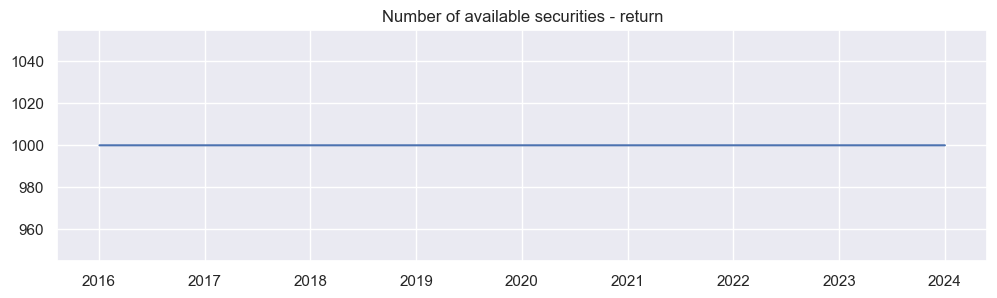

In [4]:
display_features(df=rtn, feature='return')

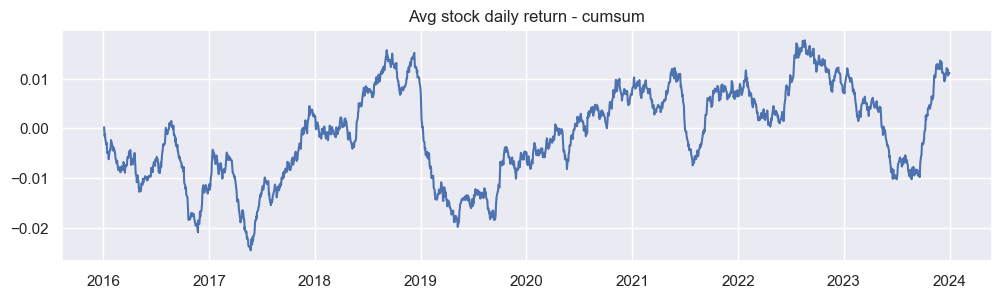

In [5]:
tmp = rtn.mean(axis=1).cumsum().to_frame().reset_index()
visualization(df=tmp, x='date',y=0,rotation_angel=0, title=f'Avg stock daily return - cumsum')

**MarketCap: 60 stocks have missing market cap & missing 74 days**

In [6]:
missing_tickers = missing_values(df=mktcap)
display(f'Number of stocks that have missing mktcap: {len(missing_tickers)}')

display(f'Number of days covered: {mktcap.index.nunique()}')


ticker_id,348344,293697,469208,410329,966991,300550,199256,814794,195896,310852,758298,596252,218448,820585,52635,847114,485838,258862,619979,416953,559544,352131,275011,747131,324015,470467,528951,910240,18049,642176,886998,314460,834462,620536,77474,177083,959494,463117,677011,133223,105392,618778,894468,599801,647733,472321,703576,111802,869176,424775,708407,459802,444487,383986,870513,397222,713563,623390,960596,193581,169403,955778,482753,677838,815313,497858,340575,311036,866663,694242,599019,209485,94026,82143,558436,910102,593926,619260,673045,648331,305436,901045,844690,103616,459712,386562,225811,527818,952747,206039,936103,317246,808136,25453,850089,761385,153645,819439,843700,448444,146004,458655,286874,11522,997953,66286,299727,257477,631935,411162,817733,407861,224192,913612,829063,966184,957019,907704,844431,58604,267596,618409,942705,142519,571095,716161,511422,144415,972178,533354,178296,226604,136522,350895,846374,951523,834612,130157,625806,742449,466092,679784,965939,357254,519497,973499,489958,365227,883744,651138,809566,994980,326213,977331,531172,485468,727520,291124,508617,835040,946171,292703,67733,49874,852237,529533,890081,258912,834382,863597,163415,895523,676846,115015,490918,382030,764772,807417,624012,169687,562952,410222,708394,538758,21771,639824,611601,507029,975127,188013,706924,324465,403557,970221,771214,958175,312063,297105,448621,859142,542806,529574,834504,725147,511126,801372,45169,908039,944924,793457,665724,692381,187984,553249,478843,111881,765143,90261,845532,118781,795749,766112,149562,746273,109641,994267,791143,793093,776802,594150,294737,970781,408867,194789,906868,9420,771586,380530,344628,667851,384029,657793,815043,768968,557747,348504,405956,336211,528503,508154,216023,745595,174420,13447,623306,862947,476226,730516,542666,563374,249299,981776,266108,344319,780569,762092,109299,603316,304248,668732,982495,127396,150829,137406,71254,778380,677960,903467,307130,795116,430513,520311,477237,132401,115434,508078,76696,528355,113875,886283,90485,542071,258782,743736,255534,447869,380612,730566,264590,655998,686146,475587,840450,464776,847689,551836,477566,834825,291991,543224,947515,616728,659166,240812,705759,164103,983189,51589,46670,178924,269091,768121,112133,322694,774620,206544,985634,62721,973332,190464,932719,487130,28119,869358,556376,145491,848543,829489,418344,790187,313178,237745,448486,561168,876913,377788,896338,837858,730241,722936,969607,592370,425649,467440,658820,124398,490632,262009,617407,130488,755855,192448,450859,280726,521820,994620,98787,197894,370367,739479,69632,305042,883818,724015,964965,366603,448146,114782,758835,995723,592709,547551,588914,61030,273647,920380,491659,926330,273939,116278,168363,506535,495231,453865,182393,241220,187444,703459,264,552404,623443,654202,290161,575653,42323,736262,516279,85465,588964,386906,197803,408399,284585,320182,189213,31535,301352,919508,177095,935223,837914,134104,546664,240747,21401,135143,376744,412906,935132,521494,326082,207167,199152,172299,973233,483975,282677,477820,81216,975504,954530,641555,143136,268914,420817,635311,598970,366376,509261,798266,266997,401590,255705,33606,75813,390804,69173,779254,683534,419446,43072,175372,488889,394646,897419,589491,101295,958134,936298,66979,916921,966479,866561,863629,567660,218063,972734,49628,703342,108393,209863,40736,591012,298134,925250,822732,379481,305922,776090,119175,216677,973446,436585,117964,397973,56002,427949,281659,299072,...,159752,368312,245257,82182,430116,828857,834519,297758,713157,661116,411237,476850,683279,765501,402759,644433,415974,129099,854933,293465,810529,740174,87675,785755,729958,974418,811266,898304,994765,125553,831892,757208,131167,30315,831033,120626,66218,6134,183286,65767,442016,553362,663190,723875,302559,976591,939534,551403,929757,613468,792643,655567,988919,160218,601069,758992,331393,52169,131127,450482,583185,845085,452907,806023,728959,893090,660793,743083,266360,695504,859007,473194,444424,661404,254215,5784,915110,770053,

'Number of stocks that have missing mktcap: 60'

'Number of days covered: 2013'

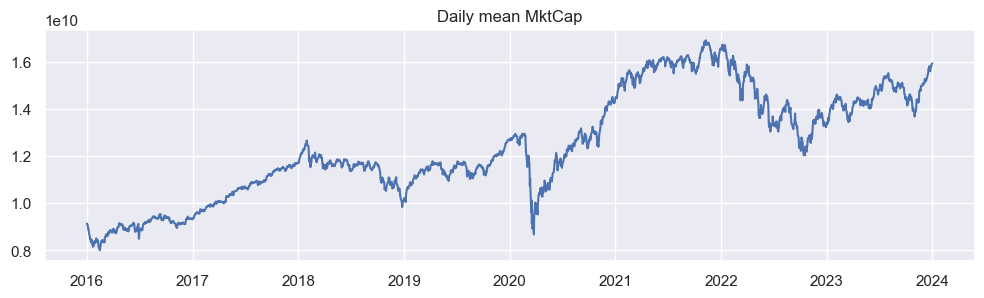

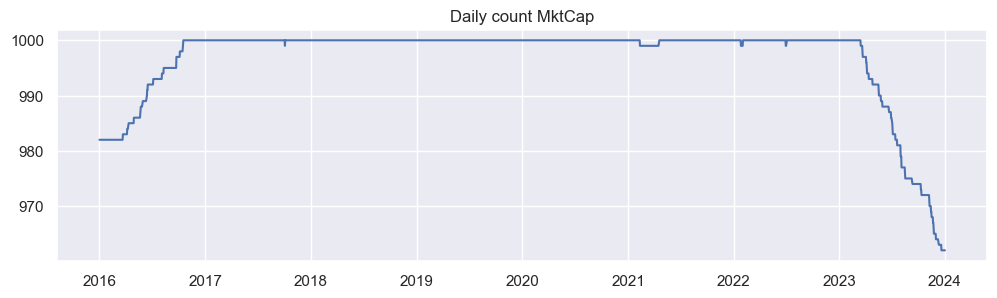

In [7]:
mktcap_analysis = mktcap.T.describe().reset_index().melt(id_vars='index')

# for ind in mktcap_analysis['index'].unique():
for ind in ['mean','count']:
    visualization(df=mktcap_analysis.loc[mktcap_analysis['index']==ind], x='date', y='value', rotation_angel=0, title=f'Daily {ind} MktCap')


**Stocks that have missing mktcap**
1. Haven't got the last quarter report - 2023Q4
2. Have missing mktcap on a few days 
3. Missing mktcap at the beginning

"60 stocks have missing mktcap, examples are: ['195896', '424775', '815313', '448444', '11522']"

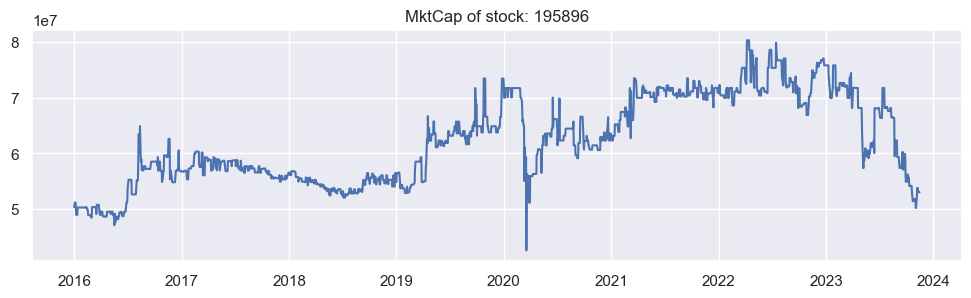

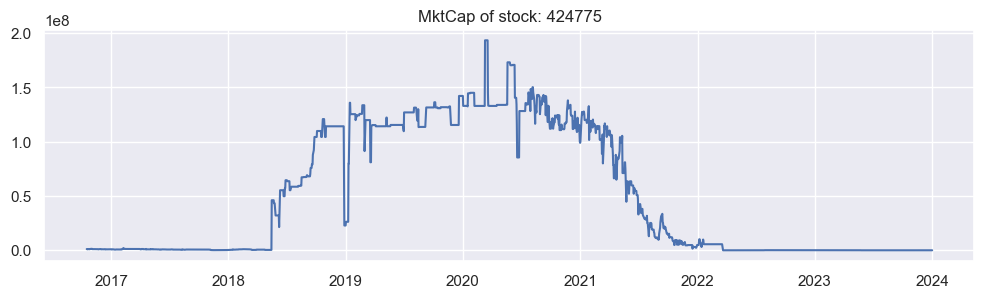

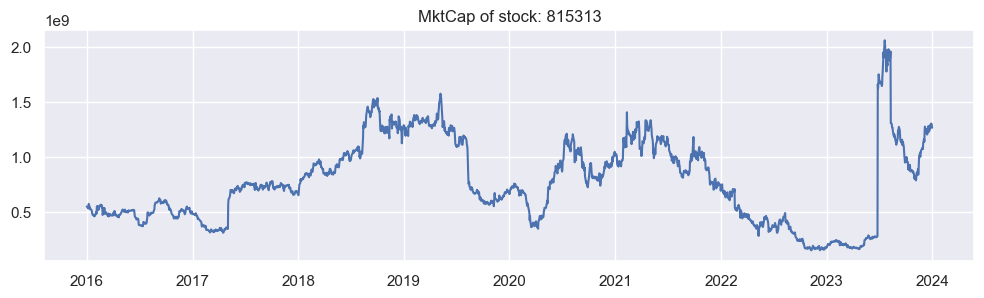

In [8]:
missing_mktcap = mktcap.isnull().any()
stocks_MissingMktcap = missing_mktcap[missing_mktcap].index.to_list()
display(f'{len(stocks_MissingMktcap)} stocks have missing mktcap, examples are: {stocks_MissingMktcap[:5]}')

for stock in stocks_MissingMktcap[:3]: 
    tmp = mktcap.loc[:,stock].reset_index()
    visualization(df=tmp, x='date',y=stock,rotation_angel=0, title=f'MktCap of stock: {stock}')

**Sectors: 33 unique sectors for 1000 stocks**

In [9]:
display(sector.head(2))
display(f'{sector.ticker_id.nunique()} unique stocks & {sector.sector.nunique()} unique sectors')

,ticker_id,sector
0,348344,Hospitality Services
1,293697,Miscellaneous Retail


'1000 unique stocks & 33 unique sectors'

### Macro variables: 
1. only GDP has 3 missing records
2. Nonfarmpayroll & Unemploymentrate tend to have higher correlation with nextday return and they are negativelly correlated with each other. 


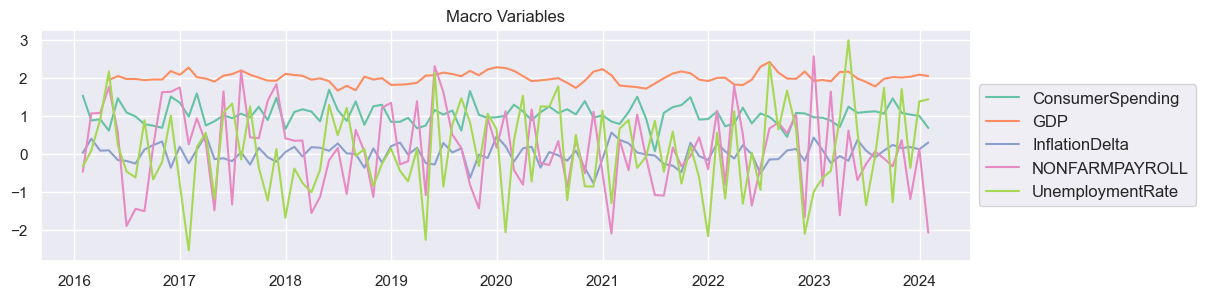

In [10]:
visualization(df=macro, x='date', y='value',hue='macro', rotation_angel=0,title='Macro Variables')


In [11]:
macro = macro.pivot(index='date',columns='macro',values='value').shift(1).iloc[1:]

display(macro.isna().sum().to_frame().T)
display(macro.tail(3))

macro,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate
0,0,3,0,0,0


macro,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate
date,,,,,
2023-11-30,1.0792,2.0097,0.1524,0.3608,1.7063
2023-12-31,1.0331,2.0323,0.1778,-1.1927,-0.3712
2024-01-31,0.9980,2.0859,0.1210,0.1277,1.3805


**Profit: number of daily analyst-avg predicted profit varies, decide to use monthly avg** 

In [12]:
display(profit.head(2))
monthly_profit = profit.groupby(['month','ticker_id'])['profit'].mean().reset_index()
display(monthly_profit.head(2))
display(monthly_profit.nunique().to_frame().T)

,date,ticker_id,analyst_id,profit,quarter,month
0,2015-12-21,975504,9455,9.6754,2015-Q4,2015-12
1,2015-12-21,150829,40448,-0.7771,2015-Q4,2015-12


,month,ticker_id,profit
0,2015-12,101295,7.4976
1,2015-12,101300,8.8411


,month,ticker_id,profit
0,98,980,94865


'monthly predicted profit start date: 2015-12-01 00:00:00'

'monthly predicted profit end date: 2024-01-01 00:00:00'

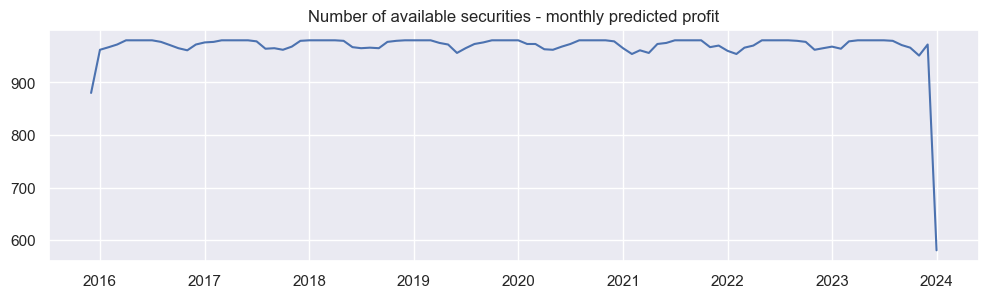

In [13]:
viz_pivot = monthly_profit.pivot(index='month',columns='ticker_id',values='profit')
viz_pivot.index = pd.to_datetime(viz_pivot.index)
display_features(df=viz_pivot, feature='monthly predicted profit')

## Feature Engineering

### Macro
1. Macro variables 
2. Used macro factors to identify different economic scenarios: cluster number is decided based on 
- Economic intuitions: Merrill Lynch's investment clock 
- Balanced stocks numbers for each group
- Clusters Distribution & Elbow method which measures the quality of the clustering for each #clusters


In [14]:
##### monthly macro scenarios 
macro_features = get_macro_features(df=macro, start_date='2016-05-31', clusters=range(3,6))
display(macro_features.head(2))
display(macro_features.nunique().to_frame().T)

macro,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate,macro_group3,macro_group4,macro_group5
date,,,,,,,,
2016-05-31,0.6128,1.9440,0.0918,1.7639,2.1726,0,0,0
2016-06-30,1.4653,2.0492,-0.1646,0.5608,0.2247,2,1,1


macro,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate,macro_group3,macro_group4,macro_group5
0,93,93,93,93,93,3,4,5


**Evaluate the clusters numbers - cluster impacts are more significant on UnemploymentRate and Nonfarmpayroll**

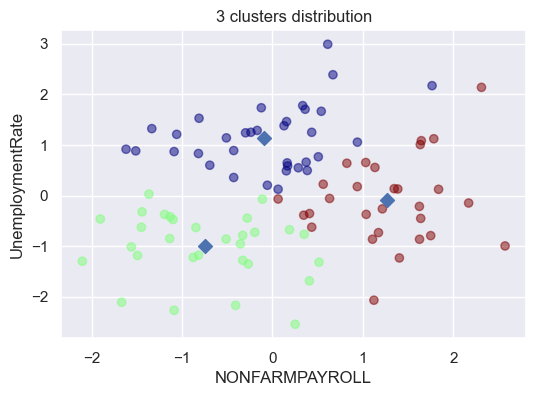

In [15]:
cluster_viz(df=macro['2016-05-30':], n_cluster=3, col1='NONFARMPAYROLL',col2='UnemploymentRate')


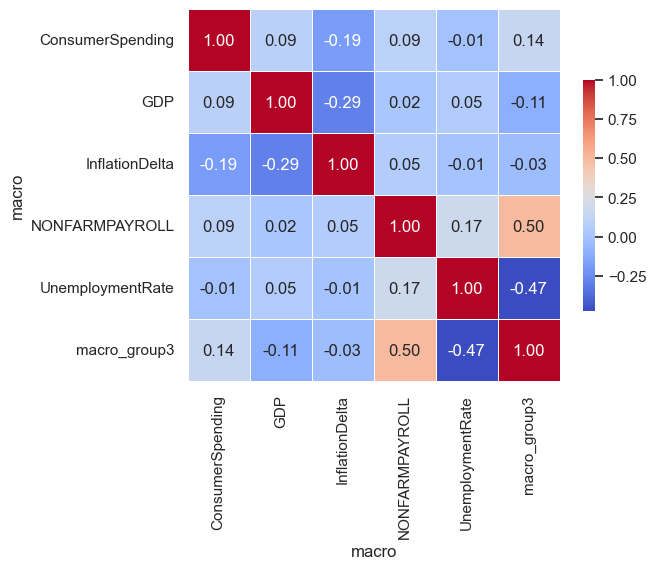

In [16]:
corr_matrix = macro_features.drop(['macro_group4','macro_group5'], axis=1).corr()
plt.figure(figsize=(6, 6))  # Optional: Specifies the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


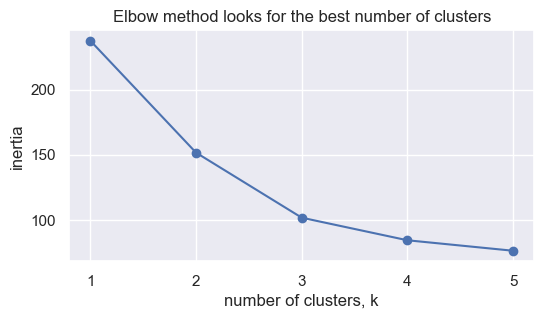

In [17]:
elblow_check(df=macro.loc['2016-05-30':])

### Profits

In [18]:
##### monthly predicted profits
profit_features = get_profit_features(df=monthly_profit)
display(profit_features.head(2))
display(profit_features.nunique().to_frame().T)

,month,ticker_id,profit,date,rank,profit_trend
0,2015-12,101295,7.4976,2015-12-01,580,0
1,2016-1,101295,7.4355,2016-01-01,693,0


,month,ticker_id,profit,date,rank,profit_trend
0,98,980,94865,98,980,2


### Combine raw features - macro/profit

In [19]:
##### combine all raw features in one table 
raw_features = get_daily_rawinput()
display(raw_features.tail(2))
display(raw_features.shape)

#### fill missing values with sector avg
col = raw_features.columns.to_list()
col.remove('sector')
features_clean = fill_missing_values(df=raw_features,col_list=col)

display(features_clean.shape)
display(features_clean.tail(2))


,,fwd_rtn,daily_rtn,mktcap_log,mktcap,sector,profit,rank,profit_trend,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate,macro_group3,macro_group4,macro_group5
date,ticker_id,,,,,,,,,,,,,,,,
2023-12-29,87897,0.0120,0.0033,22.3317,4994899707.0000,Investment Services,8.3007,622.0000,0.0000,1.0331,2.0323,0.1778,-1.1927,-0.3712,1.0000,3.0000,3.0000
2024-01-01,87897,NaN,0.0120,22.3338,5005664482.0000,Investment Services,NaN,NaN,NaN,0.9980,2.0859,0.1210,0.1277,1.3805,0.0000,0.0000,0.0000


(2086000, 16)

(2086000, 16)

sector  fwd_rtn  daily_rtn  mktcap_log  \
date       ticker_id                                                         
2024-01-01 995723       Household Services      NaN     0.0009     23.4307   
           997953     Healthcare Equipment      NaN     0.0076     18.4046   

                               mktcap  profit     rank  profit_trend  \
date       ticker_id                                                   
2024-01-01 995723    14990602148.0000 10.9983 242.0000        0.0000   
           997953       98406360.0000  9.2254 290.8095        0.4286   

                      ConsumerSpending    GDP  InflationDelta  NONFARMPAYROLL  \
date       ticker_id                                                            
2024-01-01 995723               0.9980 2.0859          0.1210          0.1277   
           997953               0.9980 2.0859          0.1210          0.1277   

                      UnemploymentRate  macro_group3  macro_group4  \
date       ticker_id                                                 
2024-01-01 995723               1.3805        0.0000        0.0000   
           997953               1.3805        0.0000        0.0000   

                      macro_group5  
date       ticker_id                
2024-01-01 995723           0.0000  
           997953           0.0000

**Relationship between Macro/Alternative features and forward day return**

In [20]:
data = features_clean.reset_index().set_index('date')
data = data.drop(['ticker_id'], axis=1)
feature_col = ['fwd_rtn', 'daily_rtn', 'mktcap_log', 'profit',
       'rank', 'profit_trend', 'ConsumerSpending', 'GDP', 'InflationDelta',
       'NONFARMPAYROLL', 'UnemploymentRate']


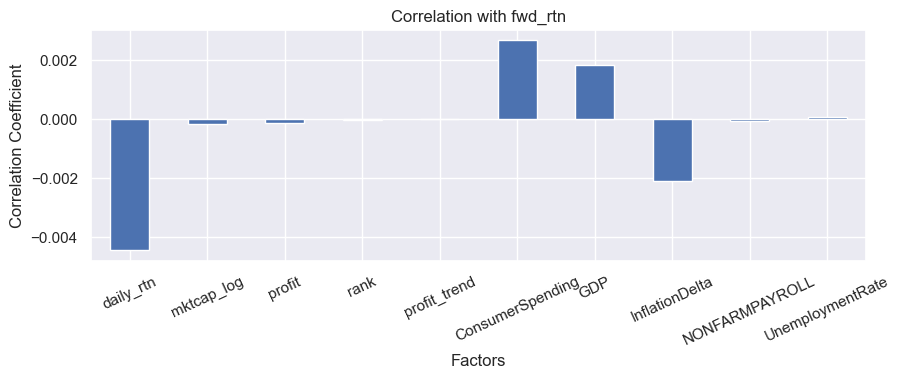

,daily_rtn,mktcap_log,profit,rank,profit_trend,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate
fwd_rtn,-0.0044,-0.0002,-0.0001,-0.0000,0.0000,0.0027,0.0018,-0.0021,-0.0001,0.0001


In [21]:
overall_corr = plot_correlation_chart(data[feature_col], 'fwd_rtn')
# np.corrcoef(fwd_rtn.iloc[:-1].to_numpy().flatten(),rtn.iloc[:-1].to_numpy().flatten()) # backtest calculation
overall_corr

Category: 0.0


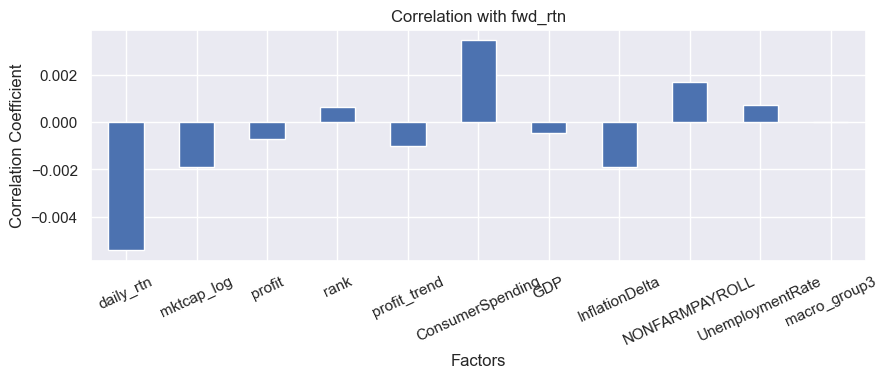

Category: 1.0


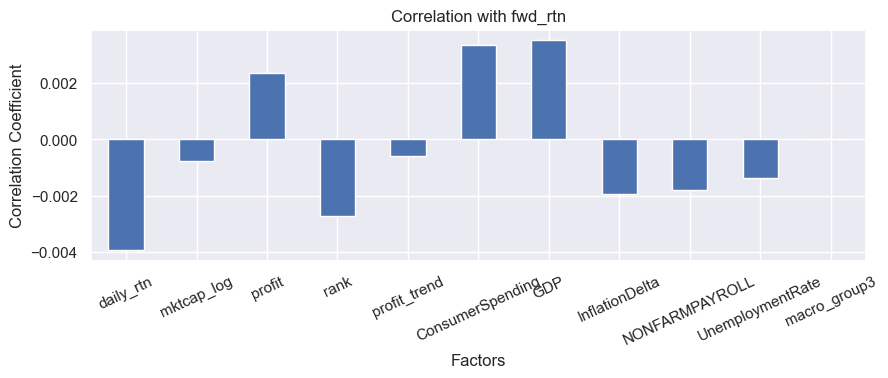

Category: 2.0


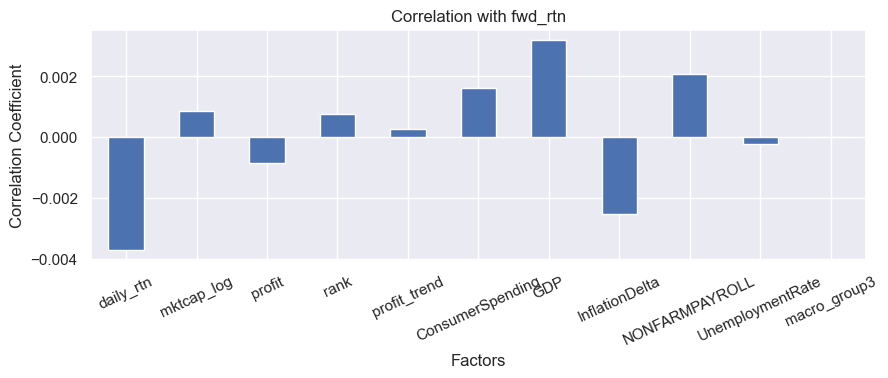

,daily_rtn,mktcap_log,profit,rank,profit_trend,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate,ind
fwd_rtn,-0.0054,-0.0019,-0.0007,0.0006,-0.0010,0.0035,-0.0004,-0.0019,0.0017,0.0007,0.0000
fwd_rtn,-0.0039,-0.0008,0.0024,-0.0027,-0.0006,0.0033,0.0035,-0.0019,-0.0018,-0.0014,1.0000
fwd_rtn,-0.0037,0.0009,-0.0008,0.0008,0.0003,0.0016,0.0032,-0.0025,0.0021,-0.0002,2.0000


In [22]:
grouped = data[feature_col+['macro_group3']].groupby('macro_group3')
group3_corr = pd.DataFrame()
for name, group in grouped:
    print(f"Category: {name}")
    tmp = plot_correlation_chart(group, 'fwd_rtn')
    tmp.loc[:,'ind'] = name
    group3_corr = pd.concat([group3_corr,tmp])

group3_corr.drop('macro_group3', axis=1)

In [23]:
grouped = data[feature_col+['sector']].groupby('sector')

sector_corr = pd.DataFrame()

for name, group in grouped:
#     print(f"Category: {name}")
    tmp = plot_correlation_chart(group.drop('sector', axis=1), 'fwd_rtn', plot=False)
    tmp.loc[:,'sector'] = name
    sector_corr = pd.concat([sector_corr,tmp])

sector_corr


,daily_rtn,mktcap_log,profit,rank,profit_trend,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate,sector
fwd_rtn,-0.0009,-0.0032,-0.0016,0.0016,-0.0069,0.0073,0.0099,-0.0086,-0.0032,0.0064,Banking
fwd_rtn,-0.0131,-0.0014,-0.0011,0.0006,-0.0002,0.0028,0.0063,-0.0018,0.0030,0.0026,Biopharmaceuticals
fwd_rtn,-0.0085,0.0005,-0.0041,0.0029,-0.0130,0.0016,0.0024,0.0048,-0.0009,-0.0063,Business Services
fwd_rtn,0.0086,-0.0046,0.0025,-0.0031,-0.0026,0.0037,0.0034,-0.0092,0.0057,0.0020,"Chemical, Plastic and Rubber Materials"
fwd_rtn,-0.0184,-0.0022,-0.0003,0.0004,-0.0035,0.0025,0.0019,-0.0072,0.0058,0.0019,Consumer Goods
fwd_rtn,0.0020,-0.0012,0.0042,-0.0037,0.0077,-0.0006,-0.0001,-0.0052,-0.0041,-0.0032,Consumer Retail
fwd_rtn,-0.0077,-0.0021,0.0018,-0.0016,0.0021,0.0093,0.0030,-0.0047,0.0046,-0.0037,Consumer Vehicles and Parts
fwd_rtn,-0.0131,0.0020,-0.0035,0.0024,-0.0024,0.0046,0.0003,-0.0048,-0.0018,0.0041,Corporate or Other Unallocated Revenue
fwd_rtn,0.0103,-0.0036,-0.0009,0.0014,0.0015,0.0055,0.0032,-0.0006,0.0025,-0.0023,Downstream and Midstream Energy
fwd_rtn,-0.0151,-0.0015,-0.0004,0.0004,0.0002,0.0013,0.0017,-0.0032,0.0010,0.0040,Electronic Components and Manufacturing


In [24]:
high_corr_sectors = pd.DataFrame()
for col in ['daily_rtn', 'mktcap_log', 'profit', 'rank', 'profit_trend',
       'ConsumerSpending', 'GDP', 'InflationDelta', 'NONFARMPAYROLL',
       'UnemploymentRate', 'sector']:
    tmp = sector_corr.sort_values(by=col).iloc[:3][['sector']].rename(columns={'sector':col})
    high_corr_sectors = pd.concat([high_corr_sectors,tmp],axis=1)
high_corr_sectors

,daily_rtn,mktcap_log,profit,rank,profit_trend,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate,sector
fwd_rtn,Consumer Goods,Manufactured Products,Business Services,Hardware,Business Services,Utilities,Healthcare Services,"Chemical, Plastic and Rubber Materials",Insurance,Business Services,Banking
fwd_rtn,Electronic Components and Manufacturing,"Chemical, Plastic and Rubber Materials",Corporate or Other Unallocated Revenue,Consumer Retail,Manufactured Products,Household Services,General or Multi-Industry Revenue,Banking,Upstream Energy,General or Multi-Industry Revenue,Biopharmaceuticals
fwd_rtn,Media and Publishing Services,Software and Consulting,Healthcare Services,"Chemical, Plastic and Rubber Materials",Banking,Media and Publishing Services,Investment Services,Food and Staples Retail,Industrial Services,Hospitality Services,Business Services


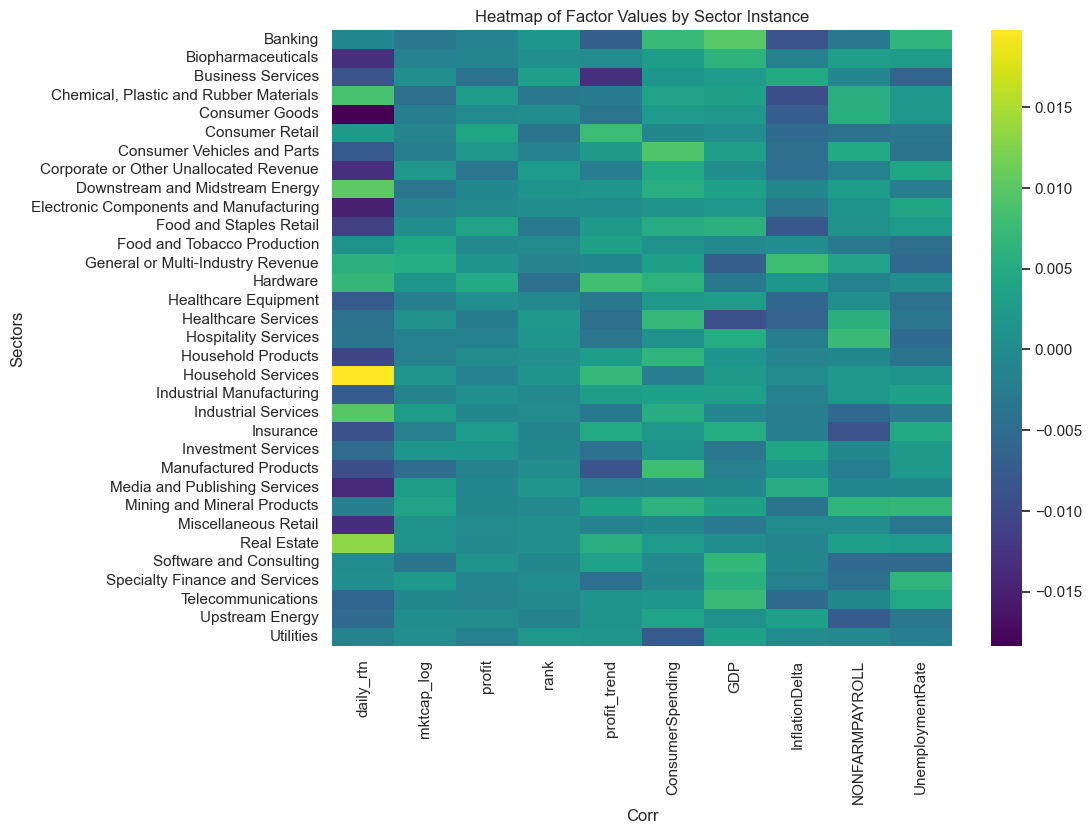

In [25]:
plt.figure(figsize=(10, 8))  
tmp = sector_corr.set_index('sector')
sns.heatmap(tmp, cmap='viridis')
plt.title('Heatmap of Factor Values by Sector Instance')
plt.ylabel('Sectors')
plt.xlabel('Corr')
plt.show()


### Signals Generation

In [26]:
##### Generate technical features 
technical_signals = get_signals(rtn=rtn, features_all=features_clean)
technical_signals.shape

(2086000, 28)

PCA Overview
Total: 28 components
----------------------------------------
Mean explained variance: 0.036
----------------------------------------
    explained variance  cumulative
1               0.6801      0.6801
2               0.1156      0.7956
3               0.0930      0.8887
4               0.0349      0.9236
5               0.0229      0.9464
6               0.0225      0.9690
7               0.0101      0.9791
8               0.0063      0.9854
9               0.0057      0.9911
10              0.0046      0.9957
11              0.0014      0.9971
12              0.0013      0.9984
13              0.0010      0.9994
14              0.0003      0.9997
15              0.0003      0.9999
16              0.0001      1.0000
17              0.0000      1.0000
18              0.0000      1.0000
19              0.0000      1.0000
20              0.0000      1.0000
----------------------------------------
Limit scree plot to nth component (0 for all) > 13


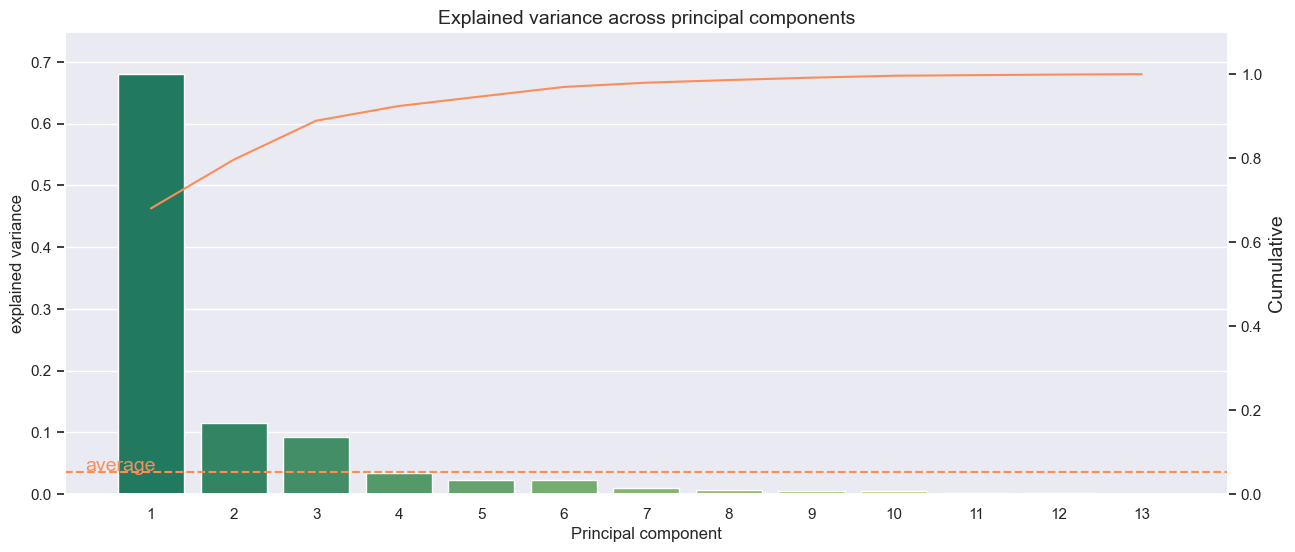

In [29]:
##### Use PCA to decompose the various technical features as they are originally high correlated  
technical_signals_PCA = PCA_factors(df=technical_signals)

In [28]:
##### generate time related features to caputure the calendar impact 
time_signals = get_time_signals(df=technical_signals_PCA)
time_signals.tail(2)



,,rtn_1w,rtn_1m,rtn_6m,rtn_1y,rtn_z_1w,rtn_z_1m,rtn_z_6m,rtn_z_1y,rtn_skew_1w,rtn_skew_1m,rtn_skew_6m,rtn_skew_1y,up_rtn_1w,up_rtn_1m,up_rtn_6m,up_rtn_1y,down_rtn_1w,down_rtn_1m,down_rtn_6m,down_rtn_1y,cap_1w,cap_1m,cap_6m,cap_1y,cap_z_1w,cap_z_1m,cap_z_6m,cap_z_1y,PC1,PC2,PC3,PC4,PC5,Week_Number,Month,Quarter
date,ticker_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-12-29,87897,-0.0013,0.0007,0.0001,0.0000,1.1358,0.7676,0.7601,0.7013,-0.8307,-0.1065,-0.1194,-0.1808,0.0008,0.0016,0.0016,0.0018,-0.0021,-0.0010,-0.0015,-0.0018,NaN,18.4820,18.5873,18.7881,NaN,-1.5028,-1.0518,-1.3812,3.6359,-1.9854,1.6475,-0.4205,0.9117,5,12,4
2024-01-01,87897,0.0026,0.0013,0.0002,0.0001,1.6595,2.5162,2.7195,2.5026,1.5149,0.5482,-0.0002,-0.1364,0.0032,0.0022,0.0017,0.0019,-0.0006,-0.0009,-0.0015,-0.0018,NaN,18.4759,18.5832,18.7852,NaN,-1.4372,-1.0731,-1.3916,3.6425,-1.9797,4.7410,-0.3670,-1.5211,1,1,1


In [30]:
##### Combine all macro/alternative/technical/quantitative features 
signals = features_clean.merge(time_signals,left_index=True, right_index=True, how='left')
display(signals.shape)
display(signals.tail(2))

(2086000, 52)

sector  fwd_rtn  daily_rtn  mktcap_log  \
date       ticker_id                                                         
2024-01-01 995723       Household Services      NaN     0.0009     23.4307   
           997953     Healthcare Equipment      NaN     0.0076     18.4046   

                               mktcap  profit     rank  profit_trend  \
date       ticker_id                                                   
2024-01-01 995723    14990602148.0000 10.9983 242.0000        0.0000   
           997953       98406360.0000  9.2254 290.8095        0.4286   

                      ConsumerSpending    GDP  InflationDelta  NONFARMPAYROLL  \
date       ticker_id                                                            
2024-01-01 995723               0.9980 2.0859          0.1210          0.1277   
           997953               0.9980 2.0859          0.1210          0.1277   

                      UnemploymentRate  macro_group3  macro_group4  \
date       ticker_id                                                 
2024-01-01 995723               1.3805        0.0000        0.0000   
           997953               1.3805        0.0000        0.0000   

                      macro_group5  rtn_1w  rtn_1m  rtn_6m  rtn_1y  rtn_z_1w  \
date       ticker_id                                                           
2024-01-01 995723           0.0000  0.0021  0.0004  0.0003  0.0000   -0.4255   
           997953           0.0000  0.0198  0.0044  0.0036 -0.0003   -0.4641   

                      rtn_z_1m  rtn_z_6m  rtn_z_1y  rtn_skew_1w  rtn_skew_1m  \
date       ticker_id                                                           
2024-01-01 995723       0.1883    0.2794    0.3808      -0.9561       0.0254   
           997953       0.1005    0.1670    0.3265       1.5469       0.3520   

                      rtn_skew_6m  rtn_skew_1y  up_rtn_1w  up_rtn_1m  \
date       ticker_id                                                   
2024-01-01 995723          0.1419      -0.0618     0.0025     0.0014   
           997953          0.2620       0.4940     0.0208     0.0133   

                      up_rtn_6m  up_rtn_1y  down_rtn_1w  down_rtn_1m  \
date       ticker_id                                                   
2024-01-01 995723        0.0011     0.0009      -0.0004      -0.0010   
           997953        0.0113     0.0093      -0.0010      -0.0089   

                      down_rtn_6m  down_rtn_1y  cap_1w  cap_1m  cap_6m  \
date       ticker_id                                                     
2024-01-01 995723         -0.0008      -0.0009     NaN 19.8118 19.6639   
           997953         -0.0077      -0.0096     NaN 20.4226 20.4089   

                      cap_1y  cap_z_1w  cap_z_1m  cap_z_6m  cap_z_1y    PC1  \
date       ticker_id                                                          
2024-01-01 995723    19.5853       NaN    1.4801    3.2907    3.2181 1.6339   
           997953    20.4088       NaN    1.0221    0.7164    0.3947 0.7021   

                        PC2    PC3     PC4     PC5  Week_Number  Month  \
date       ticker_id                                                     
2024-01-01 995723    4.7384 0.2597 -1.1216  0.9413            1      1   
           997953    1.1003 0.1091  0.3734 -1.5854            1      1   

                      Quarter  
date       ticker_id           
2024-01-01 995723           1  
           997953           1

In [31]:
data = signals.reset_index().set_index('date')
data = data.drop(['ticker_id'], axis=1)
features_col = ['fwd_rtn', 'daily_rtn', 'mktcap_log', 'mktcap', 'profit',
       'rank', 'profit_trend', 'ConsumerSpending', 'GDP', 'InflationDelta',
       'NONFARMPAYROLL', 'UnemploymentRate', 'macro_group3', 'macro_group4',
       'macro_group5', 'rtn_1w', 'rtn_1m', 'rtn_6m', 'rtn_1y', 'rtn_z_1w',
       'rtn_z_1m', 'rtn_z_6m', 'rtn_z_1y', 'rtn_skew_1w', 'rtn_skew_1m',
       'rtn_skew_6m', 'rtn_skew_1y', 'up_rtn_1w', 'up_rtn_1m', 'up_rtn_6m',
       'up_rtn_1y', 'down_rtn_1w', 'down_rtn_1m', 'down_rtn_6m', 'down_rtn_1y',
       'cap_1w', 'cap_1m', 'cap_6m', 'cap_1y', 'cap_z_1w', 'cap_z_1m',
       'cap_z_6m', 'cap_z_1y', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5',
       'Week_Number', 'Month', 'Quarter']

mask = overall_corr.abs() > 0.002
filtered_df = overall_corr.loc[:, mask.any()]
filtered_df

data.head(2)

,sector,fwd_rtn,daily_rtn,mktcap_log,mktcap,profit,rank,profit_trend,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate,macro_group3,macro_group4,macro_group5,rtn_1w,rtn_1m,rtn_6m,rtn_1y,rtn_z_1w,rtn_z_1m,rtn_z_6m,rtn_z_1y,rtn_skew_1w,rtn_skew_1m,rtn_skew_6m,rtn_skew_1y,up_rtn_1w,up_rtn_1m,up_rtn_6m,up_rtn_1y,down_rtn_1w,down_rtn_1m,down_rtn_6m,down_rtn_1y,cap_1w,cap_1m,cap_6m,cap_1y,cap_z_1w,cap_z_1m,cap_z_6m,cap_z_1y,PC1,PC2,PC3,PC4,PC5,Week_Number,Month,Quarter
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,Corporate or Other Unallocated Revenue,-0.0011,-0.0068,21.3499,1871331242.0000,7.4355,693.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0000,0.0000,-0.0000,-0.0000,0.0000,1,1,1
2016-01-04,Real Estate,0.0087,0.0534,18.2405,83513996.0000,5.3021,822.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0000,0.0000,-0.0000,-0.0000,0.0000,1,1,1


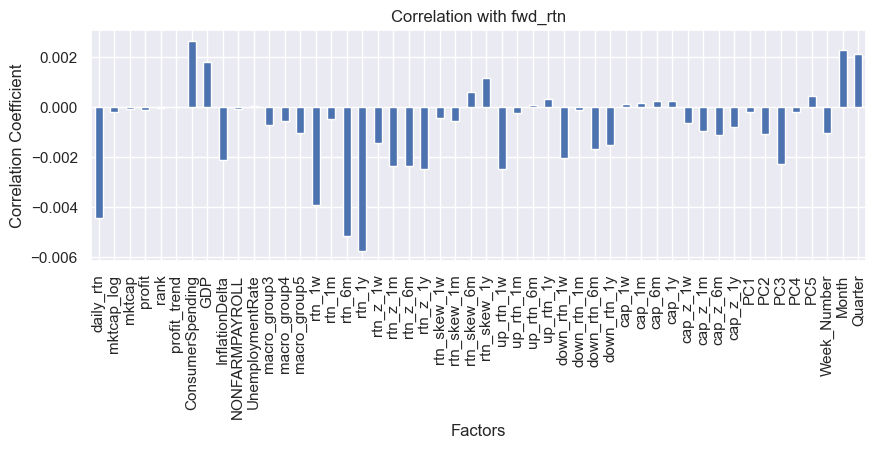

,daily_rtn,mktcap_log,mktcap,profit,rank,profit_trend,ConsumerSpending,GDP,InflationDelta,NONFARMPAYROLL,UnemploymentRate,macro_group3,macro_group4,macro_group5,rtn_1w,rtn_1m,rtn_6m,rtn_1y,rtn_z_1w,rtn_z_1m,rtn_z_6m,rtn_z_1y,rtn_skew_1w,rtn_skew_1m,rtn_skew_6m,rtn_skew_1y,up_rtn_1w,up_rtn_1m,up_rtn_6m,up_rtn_1y,down_rtn_1w,down_rtn_1m,down_rtn_6m,down_rtn_1y,cap_1w,cap_1m,cap_6m,cap_1y,cap_z_1w,cap_z_1m,cap_z_6m,cap_z_1y,PC1,PC2,PC3,PC4,PC5,Week_Number,Month,Quarter
fwd_rtn,-0.0044,-0.0002,-0.0001,-0.0001,-0.0000,0.0000,0.0027,0.0018,-0.0021,-0.0001,0.0001,-0.0007,-0.0005,-0.0010,-0.0039,-0.0005,-0.0052,-0.0058,-0.0014,-0.0024,-0.0023,-0.0025,-0.0004,-0.0006,0.0006,0.0012,-0.0025,-0.0002,0.0001,0.0003,-0.0020,-0.0001,-0.0017,-0.0015,0.0001,0.0002,0.0002,0.0002,-0.0006,-0.0009,-0.0011,-0.0008,-0.0002,-0.0011,-0.0023,-0.0002,0.0005,-0.0011,0.0023,0.0021


In [32]:
# np.corrcoef(fwd_rtn.iloc[:-1].to_numpy().flatten(),rtn.iloc[:-1].to_numpy().flatten()) # backtest calculation
overall_corr = plot_correlation_chart(data[features_col], 'fwd_rtn', angel=90)
overall_corr

## Model Development + Backtest in various Universes

In [33]:
mktcap = date_idx.merge(mktcap,left_index=True,right_index=True,how='left')

### Small Mktcap

'300 securities with the small mktcap start date: 2016-01-04 00:00:00'

'300 securities with the small mktcap end date: 2024-01-01 00:00:00'

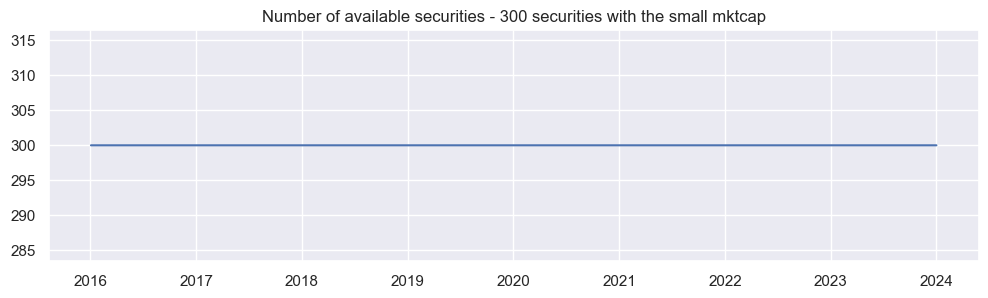

In [34]:
smallcap = universe_selection(df=mktcap, low_thred=600, high_thred=900)    
display_features(df=smallcap, feature='300 securities with the small mktcap')  
    
##### create a dataframe to indicate whether the stocks are included in the daily 900 universe
tradable = whether_in_universe(df=smallcap)
##### universe indicator 
univ = tradable.reset_index().rename(columns={'index':'date'}).melt(id_vars='date').set_index(['date','ticker_id'])
univ = univ.loc[univ.value == 1]

In [35]:
signals_in_univ = signals.loc[signals.index.isin(univ.index)]
fwd_rtn_1 = rtn.shift(-1)

# display(f'Signals df: {signals.shape}')
# display(f'Signals in trade universe df: {signals_in_univ.shape}' )
# display(f'Forward return: {fwd_rtn_1.shape}')

##### Market/Sector neutralization
betas = get_betas(df=rtn)
# display(betas.shape)
# display(betas.tail(2))

##### get alpha - small cap 
sorted_coef_df, alpha = get_alpha(df=signals_in_univ,signals=signals,isfilter=True, col='fwd_rtn')

display(sorted_coef_df.T)

tradable = clean_backtestinput_format(df=tradable,start_date=pd.to_datetime('2017-01-04'),end_date=pd.to_datetime('2024-01-01'))
fwd_rtn = clean_backtestinput_format(df=fwd_rtn_1,start_date=pd.to_datetime('2017-01-04'),end_date=pd.to_datetime('2024-01-01'),isfwd=True)
alpha = clean_backtestinput_format(df=alpha,start_date=pd.to_datetime('2017-01-04'),end_date=pd.to_datetime('2024-01-01'))


,rtn_1y,rtn_6m,rtn_1w,up_rtn_1w,daily_rtn,rtn_z_1y,rtn_z_1m,PC3,GDP,rtn_skew_1y,sector_Electronic Components and Manufacturing,sector_Manufactured Products,sector_Software and Consulting,rtn_z_6m,Quarter,ConsumerSpending,InflationDelta,macro_group5,Month
Coefficient,-0.0479,-0.0173,0.0067,-0.0057,-0.0051,-0.0007,-0.0006,0.0006,0.0004,0.0004,-0.0004,0.0003,0.0003,0.0002,0.0002,0.0002,-0.0001,-0.0000,-0.0000


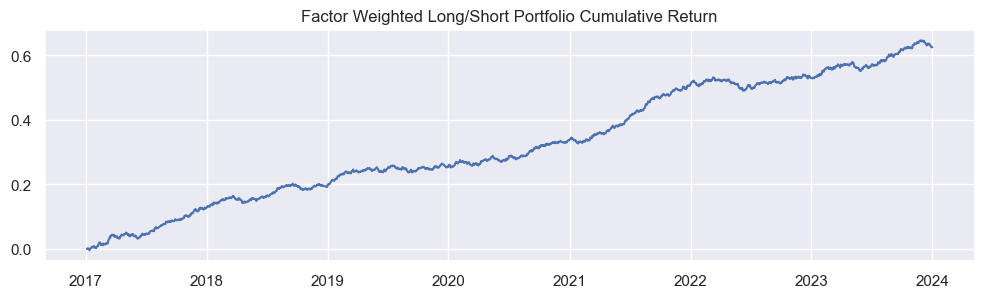

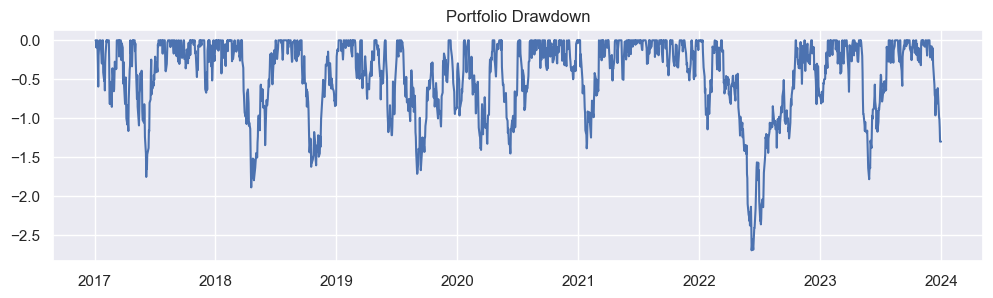

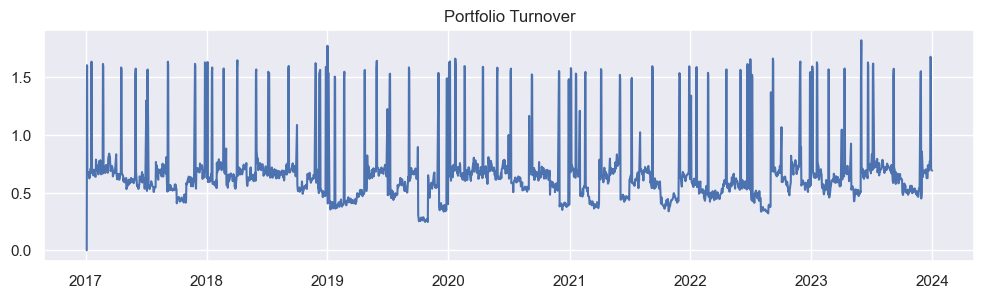

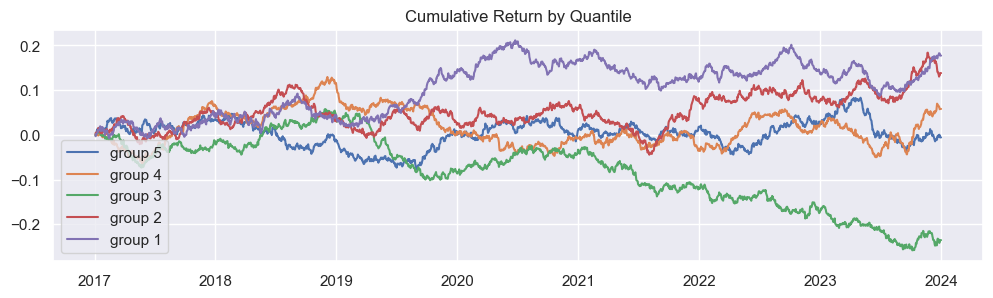

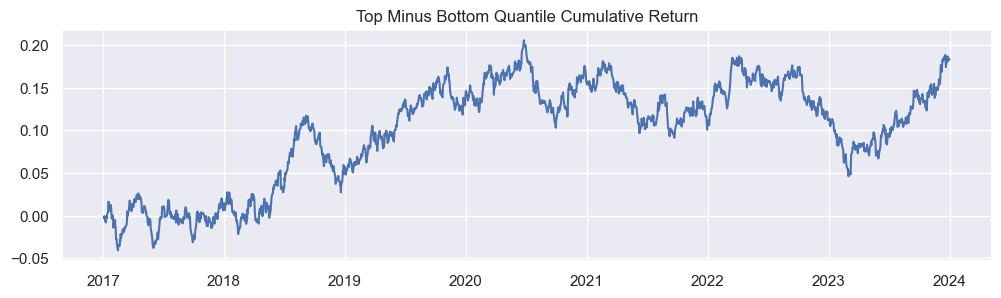

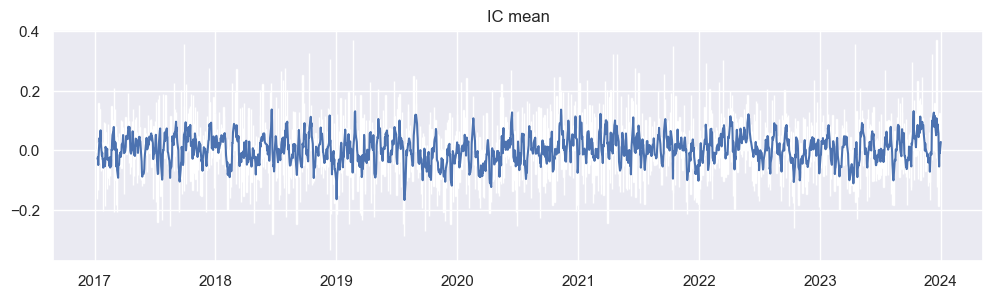

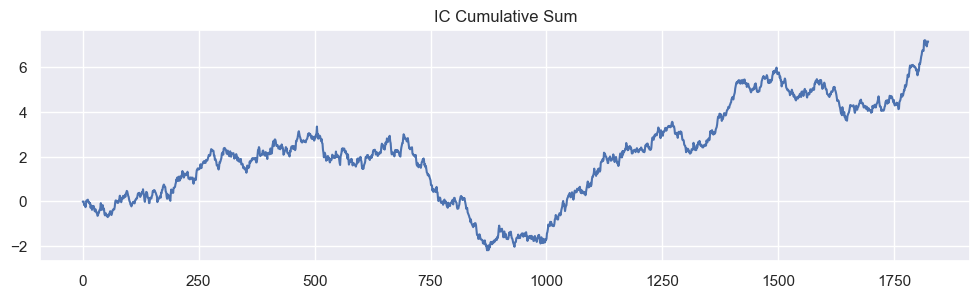

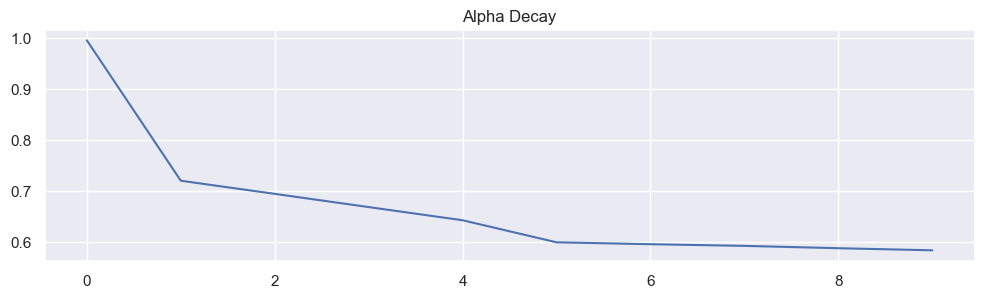

{'IC mean': '0.004', 'IC std': '0.104', 'ICIR': '0.596', 't-stats mean': '0.034', 'Factor Portfolio Return': '0.086', 'Factor Portfolio Sharpe Ratio': '2.470', 'Turnover': '0.664', 'AnnualReturn': '0.086'}


In [36]:
##### Backtesting - small cap 
sfa = SingleFactorAnalysis(forward_ret=fwd_rtn,
                           alpha_df=alpha,
                           tradable_df=tradable,
                           freq=250
                          )
sfa.Statistics()
sfa.PlotResult()

### Mid Mktcap

'300 securities with the mid size mktcap start date: 2016-01-04 00:00:00'

'300 securities with the mid size mktcap end date: 2024-01-01 00:00:00'

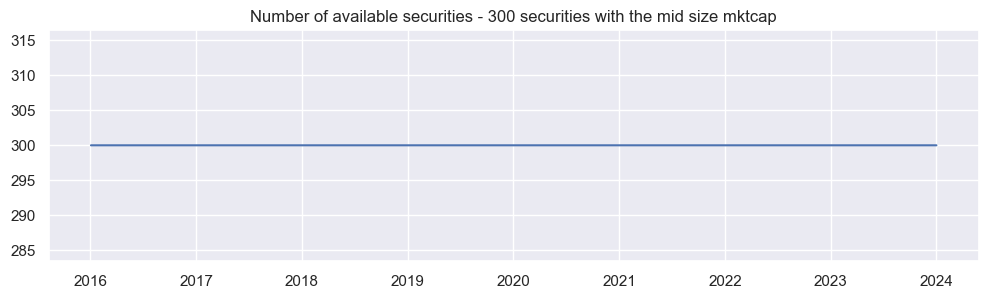

In [37]:
midcap = universe_selection(df=mktcap, low_thred=300, high_thred=600)    
display_features(df=midcap, feature='300 securities with the mid size mktcap')  
    
##### create a dataframe to indicate whether the stocks are included in the daily 900 universe
tradable = whether_in_universe(df=midcap)
# display(tradable.shape)
# display(tradable.head(2))

##### universe indicator 
univ = tradable.reset_index().rename(columns={'index':'date'}).melt(id_vars='date').set_index(['date','ticker_id'])
univ = univ.loc[univ.value == 1]
# display(univ.head(2))

In [38]:
signals_in_univ = signals.loc[signals.index.isin(univ.index)]
fwd_rtn_1 = rtn.shift(-1)

##### Market/Sector neutralization
betas = get_betas(df=rtn)

##### get alpha - small cap 
sorted_coef_df, alpha = get_alpha(df=signals_in_univ,signals=signals,isfilter=True, col='fwd_rtn')
display('Model feature importance')
display(sorted_coef_df.T)

tradable = clean_backtestinput_format(df=tradable,start_date=pd.to_datetime('2017-01-04'),end_date=pd.to_datetime('2024-01-01'))
fwd_rtn = clean_backtestinput_format(df=fwd_rtn_1,start_date=pd.to_datetime('2017-01-04'),end_date=pd.to_datetime('2024-01-01'),isfwd=True)
alpha = clean_backtestinput_format(df=alpha,start_date=pd.to_datetime('2017-01-04'),end_date=pd.to_datetime('2024-01-01'))


'Model feature importance'

,up_rtn_1m,rtn_1y,down_rtn_6m,up_rtn_6m,daily_rtn,up_rtn_1y,PC3,up_rtn_1w,down_rtn_1w,rtn_z_6m,rtn_z_1y,rtn_z_1m,rtn_z_1w,sector_Real Estate,rtn_skew_1m,sector_Hardware,profit_trend,ConsumerSpending,cap_z_1w,PC5,Month
Coefficient,0.0234,-0.0135,-0.0095,-0.0060,0.0053,-0.0037,0.0033,-0.0032,-0.0032,-0.0018,-0.0017,-0.0016,-0.0014,0.0001,-0.0001,-0.0001,0.0000,0.0000,0.0000,-0.0000,0.0000


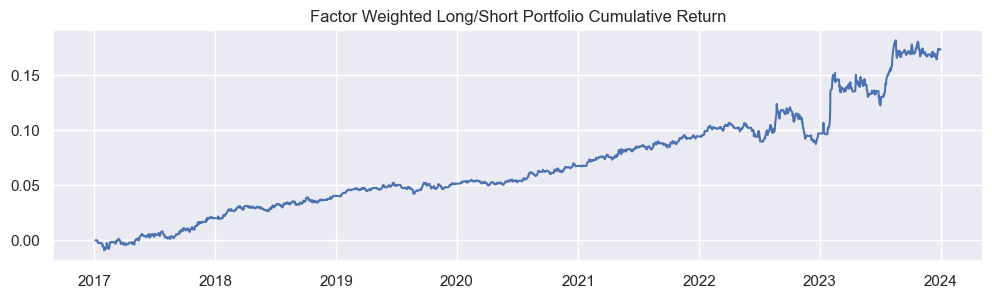

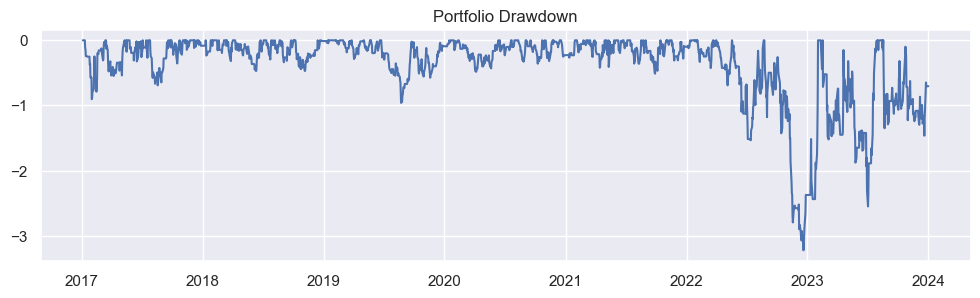

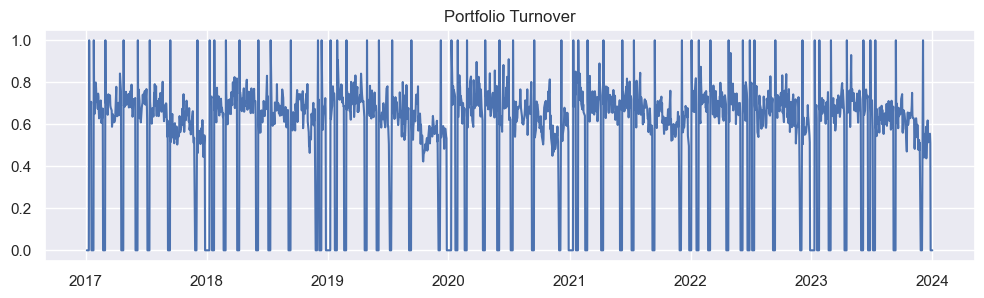

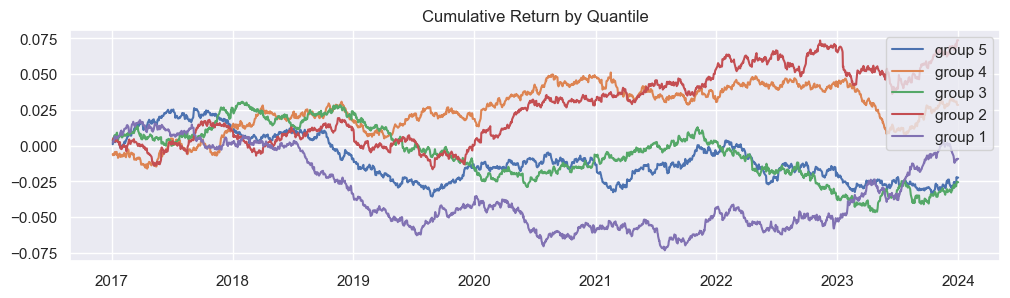

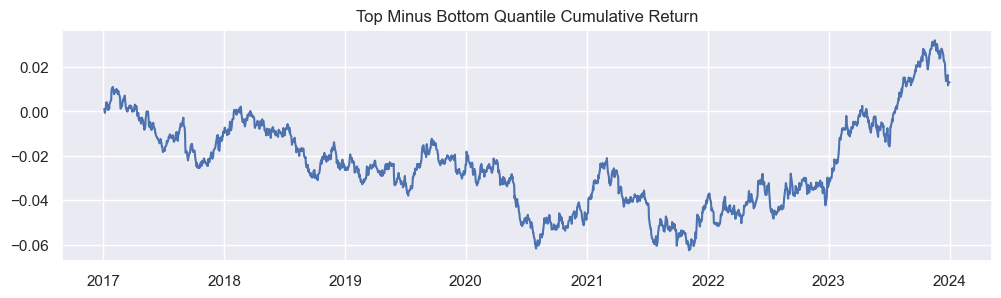

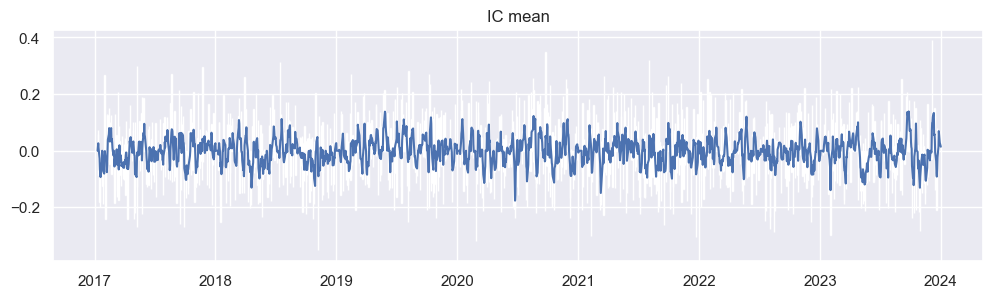

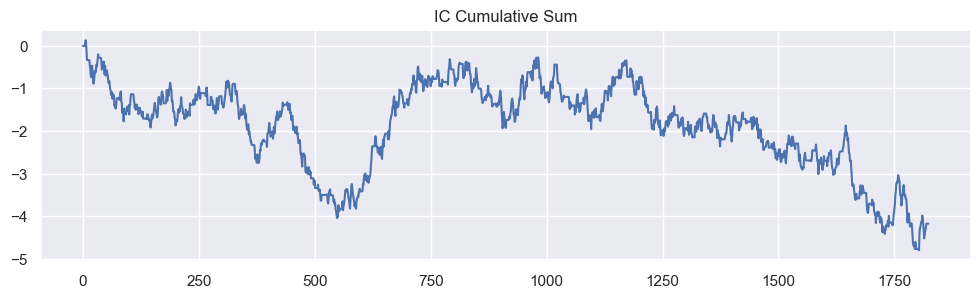

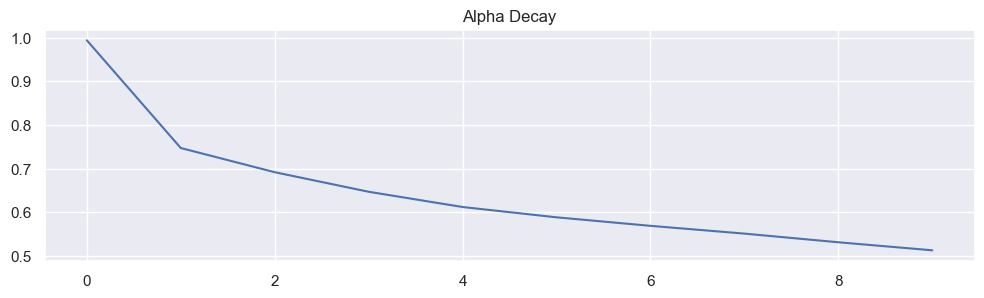

{'IC mean': '-0.002', 'IC std': '0.103', 'ICIR': '-0.352', 't-stats mean': '0.009', 'Factor Portfolio Return': '0.024', 'Factor Portfolio Sharpe Ratio': '1.006', 'Turnover': '0.557', 'AnnualReturn': '0.024'}


In [39]:
##### Backtesting - mid cap 
sfa = SingleFactorAnalysis(forward_ret=fwd_rtn,
                           alpha_df=alpha,
                           tradable_df=tradable,
                           freq=250
                          )
sfa.Statistics()
sfa.PlotResult()

### Large Mktcap

'300 securities with the largest mktcap start date: 2016-01-04 00:00:00'

'300 securities with the largest mktcap end date: 2024-01-01 00:00:00'

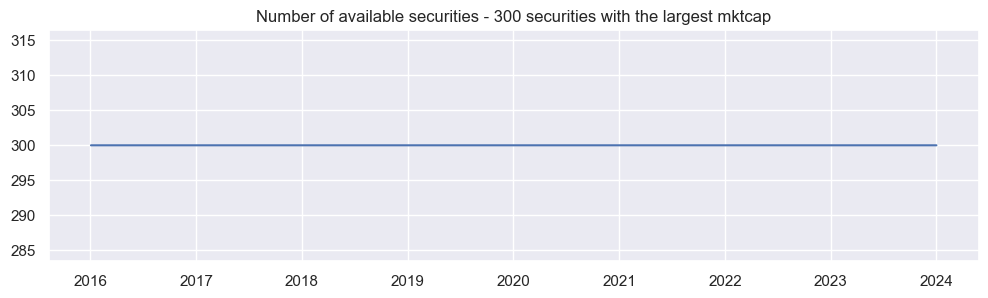

In [40]:
largecap = universe_selection(df=mktcap, low_thred=0, high_thred=300)    
display_features(df=largecap, feature='300 securities with the largest mktcap')  
    
##### create a dataframe to indicate whether the stocks are included in the daily 900 universe
tradable = whether_in_universe(df=largecap)

##### universe indicator 
univ = tradable.reset_index().rename(columns={'index':'date'}).melt(id_vars='date').set_index(['date','ticker_id'])
univ = univ.loc[univ.value == 1]


In [41]:
signals_in_univ = signals.loc[signals.index.isin(univ.index)]
fwd_rtn_1 = rtn.shift(-1)

##### Market/Sector neutralization
betas = get_betas(df=rtn)

##### get alpha - small cap 
sorted_coef_df, alpha = get_alpha(df=signals_in_univ,signals=signals,isfilter=True, col='fwd_rtn')
display('Model feature importance')
display(sorted_coef_df.T)

tradable = clean_backtestinput_format(df=tradable,start_date=pd.to_datetime('2017-01-04'),end_date=pd.to_datetime('2024-01-01'))
fwd_rtn = clean_backtestinput_format(df=fwd_rtn_1,start_date=pd.to_datetime('2017-01-04'),end_date=pd.to_datetime('2024-01-01'),isfwd=True)
alpha = clean_backtestinput_format(df=alpha,start_date=pd.to_datetime('2017-01-04'),end_date=pd.to_datetime('2024-01-01'))


'Model feature importance'

,rtn_6m,down_rtn_6m,daily_rtn,down_rtn_1w,up_rtn_1m,up_rtn_6m,down_rtn_1m,rtn_1w,up_rtn_1w,rtn_1y,down_rtn_1y,up_rtn_1y,sector_Biopharmaceuticals,sector_Household Products,sector_Hospitality Services,rtn_z_6m,rtn_z_1m,PC3,UnemploymentRate,rtn_z_1y
Coefficient,-0.0421,-0.0270,-0.0231,-0.0213,0.0186,-0.0152,0.0151,-0.0121,0.0092,-0.0086,-0.0059,-0.0027,-0.0001,-0.0001,-0.0001,0.0001,0.0000,-0.0000,-0.0000,0.0000


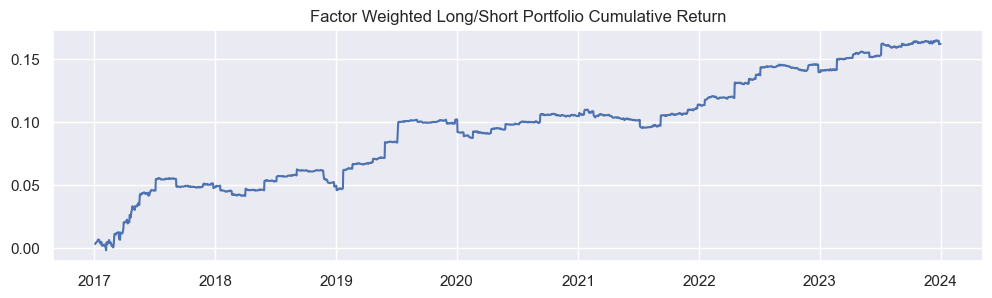

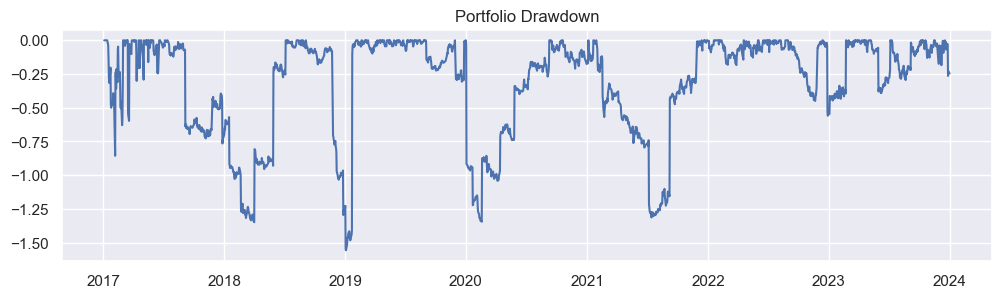

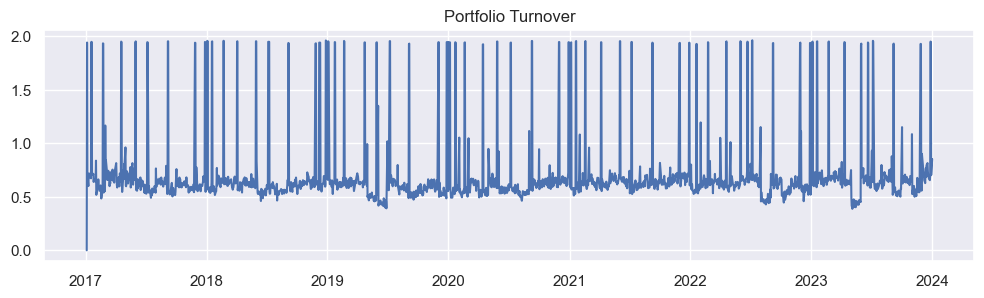

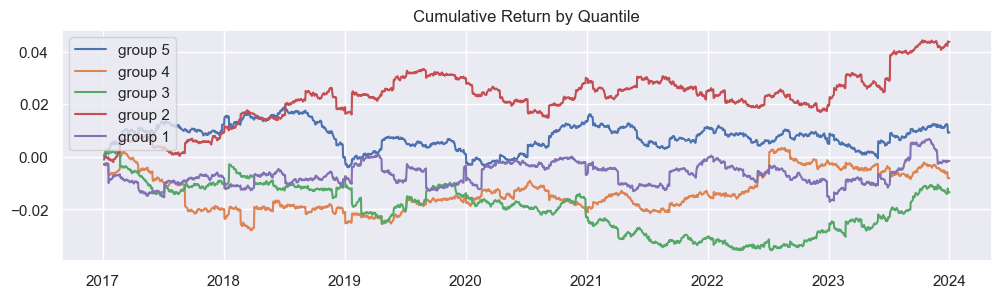

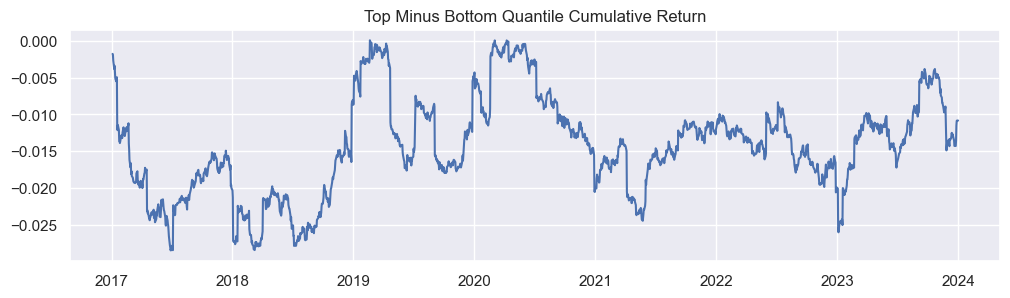

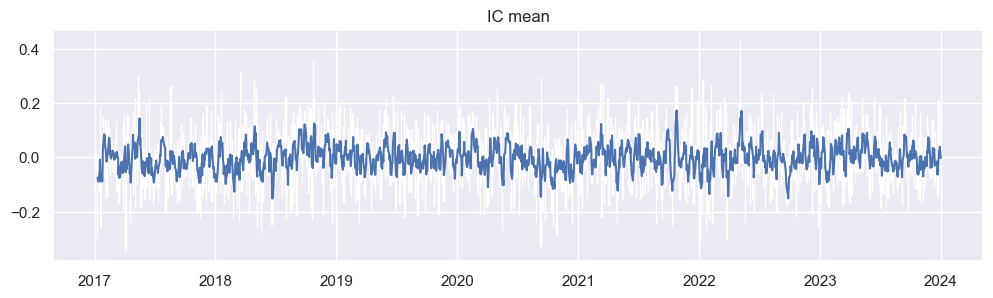

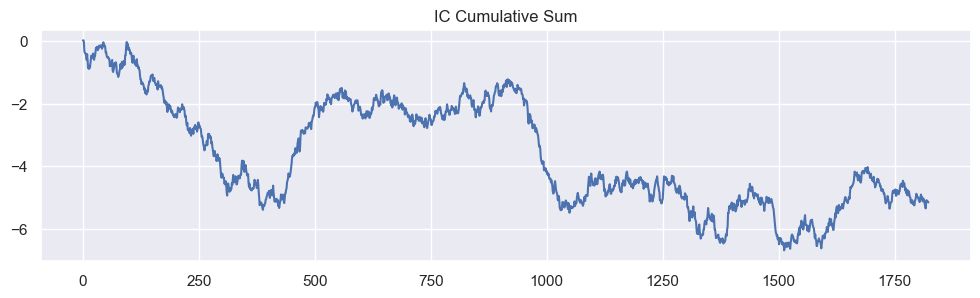

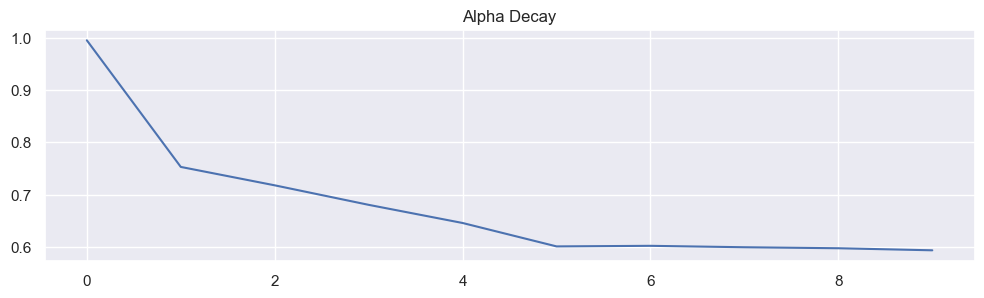

{'IC mean': '-0.003', 'IC std': '0.105', 'ICIR': '-0.427', 't-stats mean': '-0.042', 'Factor Portfolio Return': '0.022', 'Factor Portfolio Sharpe Ratio': '1.259', 'Turnover': '0.710', 'AnnualReturn': '0.022'}


In [42]:
##### Backtesting - large cap 
sfa = SingleFactorAnalysis(forward_ret=fwd_rtn,
                           alpha_df=alpha,
                           tradable_df=tradable,
                           freq=250
                          )
sfa.Statistics()
sfa.PlotResult()